## Image Classification on Fashion-MNIST.

#### Objective :
 To classify images of different pieces of clothing.

#### Client & Data-Set:
 Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

 Data-set is publicly available on kaggle and Zalando Fashion MNIST repository on Github.

  Fashion-MNIST is intended as direct drop-in replacement for the original MNIST dataset. It shares the same image size and structure of training and testing splits.

#### Business Impact:
E-commerce companies have lots of items for sale online which requires lots of images to be displayed on their websites, applications and on social media. And it takes lot of human power and time to separate these images into respective groups. This classifier which we are going to build helps businesses to categorize images into respective groups.

#### Labels:
Each training and test example is assigned to one of the following labels:

 • 0 - T-shirt/top • 1 - Trouser • 2 - Pullover • 3 - Dress • 4 - Coat • 5 - Sandal • 6 - Shirt • 7 - Sneaker • 8 - Bag • 9 - Ankle boot

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   #for plotting 
import seaborn as sns       #for visualize
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from keras.models import Sequential 
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard 
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [2]:
fashion_train_df= pd.read_csv("fashion-mnist_train.csv",sep=',') 

In [3]:
fashion_test_df= pd.read_csv("fashion-mnist_test.csv",sep=',')

In [4]:
# Visualization of Dataset
 
fashion_test_df.head()    #testing data head

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
fashion_test_df.tail()   #testing data tail

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [6]:
fashion_train_df.shape

(60000, 785)

In [7]:
fashion_train_df.head()   #training data head

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
fashion_train_df.tail()  #training data tail

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
training =np.array(fashion_train_df,dtype="float32") #2D array

In [10]:
testing =np.array(fashion_test_df,dtype="float32")#2D array

In [11]:
training

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [12]:
testing

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 1., 0.],
       [8., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Bag


8.0

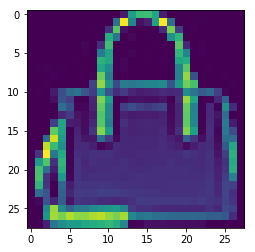

In [13]:
#here we show the image from our training dataset(for ex. 11th image of bag)

plt.imshow(training[11,1:].reshape(28,28)) 
label=training[11,0]                       
if label==0 :
    print("T-shirts/top")
elif label==1:
    print("Trouser")
elif label==2:
    print(" Pullover")
elif label==3:
    print("Dress")
elif label==4:
    print(" Coat")
elif label==5:
    print("Sandal")
elif label==6:
    print("Shirt ")
elif label==7:
    print("Sneakers")
elif label==8:
    print("Bag")
elif label==9:
    print("Ankle boot")    
label    
 # 1 Trouser 
 # 2--> Pullover 
 # 3--> Dress 
 # 4--> Coat
 # 5--> Sandal
 # 6--> Shirt 
 # 7--> Sneakers 
 # 8--> Bag
 # 9--> Ankle boot

0.0

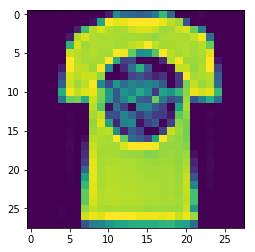

In [14]:
#here we show an image randomly from training dataset

import random 
i= random.randint(1,60000)
plt.imshow(training[i,1:].reshape(28,28))
label=training[i,0]                         #this is used to show the label ,means class of the image
label

In [15]:
#lets view more images in a grid format
#define the dimensions of the plot grid
w_grid=15
l_grid=15

#fig ,axes=plt.subplot(l_grid,w,grid)
#subplot return the figure at various locations 


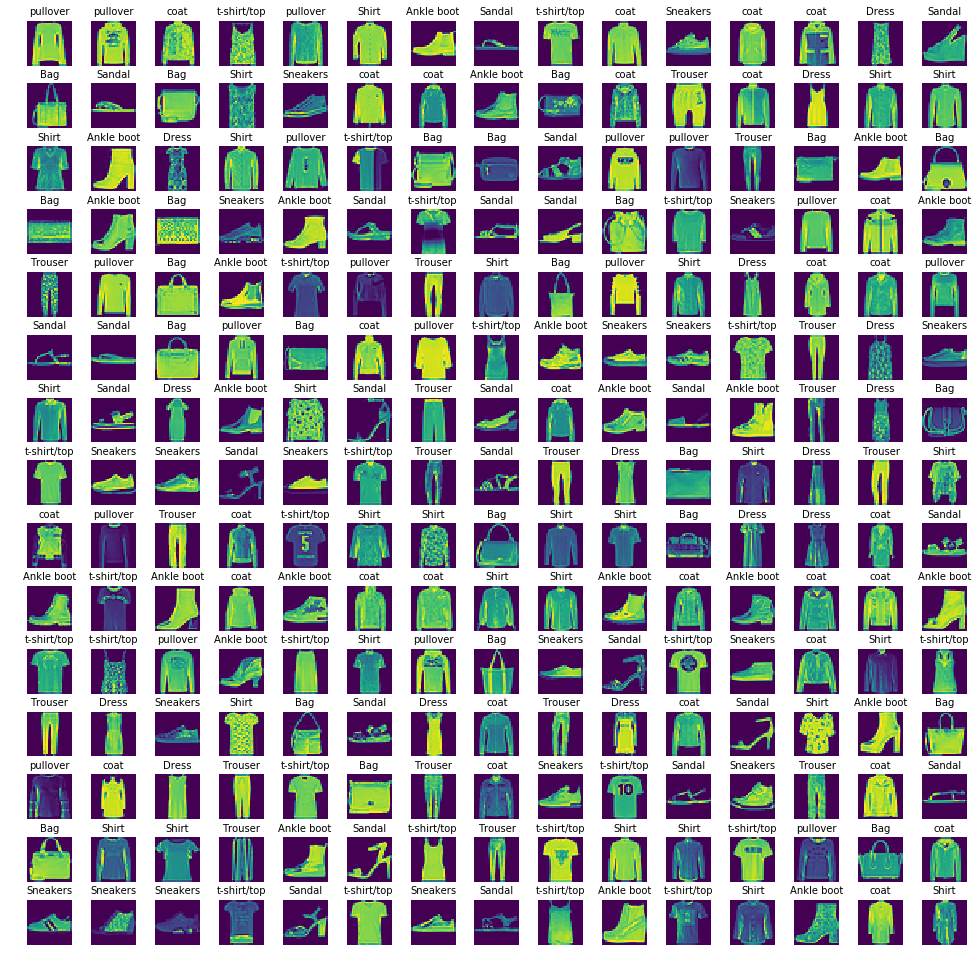

In [16]:
fig,axes=plt.subplots(l_grid,w_grid,figsize=(17,17))
axes=axes.ravel() #flatten the 15*15 matrix into 255 array 
n_training=len(training) #get the lenght of training data

# select a random number from 0 to n_training
for i in np.arange(0,w_grid*l_grid): #create evenly spaces variables
    index=np.random.randint(0,n_training)
    #read and display an image with the selected index
    axes[i].imshow(training[index,1: ].reshape((28,28)))
   # axes[i].set_title(training[index,0],fontsize=8)
    if training[index,0]==0.0:
        axes[i].set_title("t-shirt/top",fontsize=10)
    elif training[index,0]==1.0:
        axes[i].set_title("Trouser",fontsize=10)    
    elif training[index,0]==2.0:
        axes[i].set_title("pullover",fontsize=10)    
    elif training[index,0]==3.0:
        axes[i].set_title("Dress",fontsize=10)    
    elif training[index,0]==4.0:
        axes[i].set_title("coat",fontsize=10)    
    elif training[index,0]==5.0:
        axes[i].set_title("Sandal",fontsize=10) 
    elif training[index,0]==6.0:
        axes[i].set_title("Shirt",fontsize=10)
    elif training[index,0]==7.0:
        axes[i].set_title("Sneakers",fontsize=10)
    elif training[index,0]==8.0:
        axes[i].set_title("Bag",fontsize=10)
    elif training[index,0]==9.0:
        axes[i].set_title("Ankle boot",fontsize=10)    
    axes[i].axis("off")
plt.subplots_adjust(hspace=0.4)
    
# we can check the label from below
 # 0--> T-shirts/top 
 # 1--> Trouser 
 # 2--> Pullover 
 # 3--> Dress 
 # 4--> Coat
 # 5--> Sandal
 # 6--> Shirt 
 # 7--> Sneakers 
 # 8--> Bag
 # 9--> Ankle boot

In [17]:
# training the model 
x_train =training[: ,1: ]/255   #255 for normalization 
y_train=training[:,0]

x_test=testing[:,1: ]/255
y_test=testing[:,0]

In [18]:
x_train.shape


(60000, 784)

In [19]:
y_train.shape

(60000,)

In [20]:
x_test.shape

(10000, 784)

In [21]:
y_test.shape

(10000,)

In [22]:
#we split the data into train and validate 

x_train,x_validate,y_train,y_validate= train_test_split(x_train,y_train,test_size=0.2,random_state =12345)
x_train =x_train.reshape(x_train.shape[0],*(28,28,1))
x_test=x_test.reshape(x_test.shape[0],*(28,28,1))
x_validate=x_validate.reshape(x_validate.shape[0],*(28,28,1))

In [23]:
x_train.shape 

(48000, 28, 28, 1)

In [24]:
x_test.shape

(10000, 28, 28, 1)

In [25]:
x_validate.shape

(12000, 28, 28, 1)

In [26]:
#we have 48000 train data , 10000 test data , 12000 validate data

In [27]:
#here we are going to make the CNN 

In [28]:
cnn_model=Sequential()

In [29]:
cnn_model.add(Conv2D(32,3,3,input_shape=(28,28,1),activation="relu"))

C:\Users\pushpit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  """Entry point for launching an IPython kernel.


Instructions for updating:
Colocations handled automatically by placer.


In [30]:
cnn_model.add(MaxPooling2D(pool_size=(2,2))) #Pooling

In [31]:
cnn_model.add(Flatten())   #Flattening

In [32]:
cnn_model.add(Dense(output_dim=32,activation="relu"))  #Full connection

C:\Users\pushpit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  """Entry point for launching an IPython kernel.


In [33]:
cnn_model.add(Dense(output_dim=10,activation="sigmoid")) #full connection 

C:\Users\pushpit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  """Entry point for launching an IPython kernel.


In [34]:
cnn_model.compile(loss="sparse_categorical_crossentropy",optimizer=Adam(lr=0.001),metrics=["accuracy"])
# here loss is categorical because we have more than two classes

In [35]:
# Fitting the CNN to the images
cnn_model.fit(x_train,
              y_train,
              batch_size=512,
              epochs=50,
             # np_epoch=epochs,
              verbose=1,
              validation_data=(x_validate,y_validate))

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 24s 508us/step - loss: 0.9419 - acc: 0.6723 - val_loss: 0.5454 - val_acc: 0.7986
Epoch 2/50
48000/48000 [==============================] - 24s 494us/step - loss: 0.4703 - acc: 0.8356 - val_loss: 0.4441 - val_acc: 0.8415
Epoch 3/50
48000/48000 [==============================] - 27s 568us/step - loss: 0.4223 - acc: 0.8531 - val_loss: 0.4094 - val_acc: 0.8558
Epoch 4/50
48000/48000 [==============================] - 25s 528us/step - loss: 0.3877 - acc: 0.8654 - val_loss: 0.3941 - val_acc: 0.8620
Epoch 5/50
48000/48000 [==============================] - 24s 491us/step - loss: 0.3654 - acc: 0.8744 - val_loss: 0.3655 - val_acc: 0.8711
Epoch 6/50
48000/48000 [==============================] - 25s 530us/step - loss: 0.3508 - acc: 0.8786 - val_loss: 0.3498 - val_acc: 0.8802
Epoch 7/50
48000/48000 [==============================] - 25s 522us/

In [36]:
#here we have accuracy on train:0.95 and on validate :0.90 that is pretty Good

In [37]:
# EVALUATING THE MODEL

evaluation =cnn_model.evaluate(x_test,y_test)
print(f"test accuracy : {evaluation[1]}")

10000/10000 [==============================] - 2s 202us/step
test accuracy : 0.9084


In [38]:
#here we have accuracy on test data is 0.9105

In [39]:
predicted_classes=cnn_model.predict_classes(x_test) 
predicted_classes

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

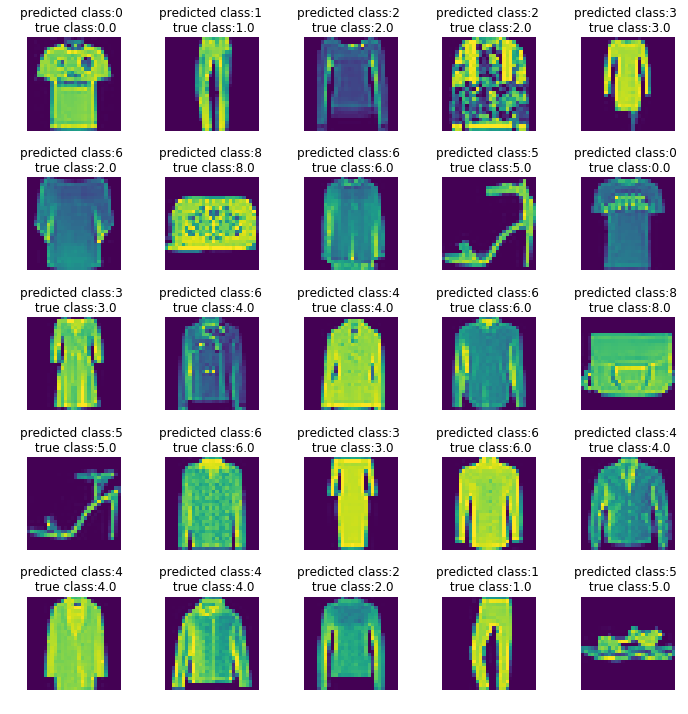

In [44]:
# visualize the predicted classes
l=5
w=5
fig,axes=plt.subplots(l,w,figsize=(12,12))
axes=axes.ravel()
for i in np.arange(0,l*w):
    axes[i].imshow(x_test[i].reshape(28,28))
    axes[i].set_title(f"predicted class:{predicted_classes[i]} \n true class:{y_test[i]}")
    axes[i].axis("off")
    plt.subplots_adjust(hspace=0.5)

In [41]:
#here we have some misclassification between classes Shirt, T-shirt/top, Pullover and Coat 
# 0--> T-shirts/top 
# 1--> Trouser 
 # 2--> Pullover 
 # 3--> Dress 
 # 4--> Coat
 # 5--> Sandal
 # 6--> Shirt 
 # 7--> Sneakers 
 # 8--> Bag
 # 9--> Ankle boot

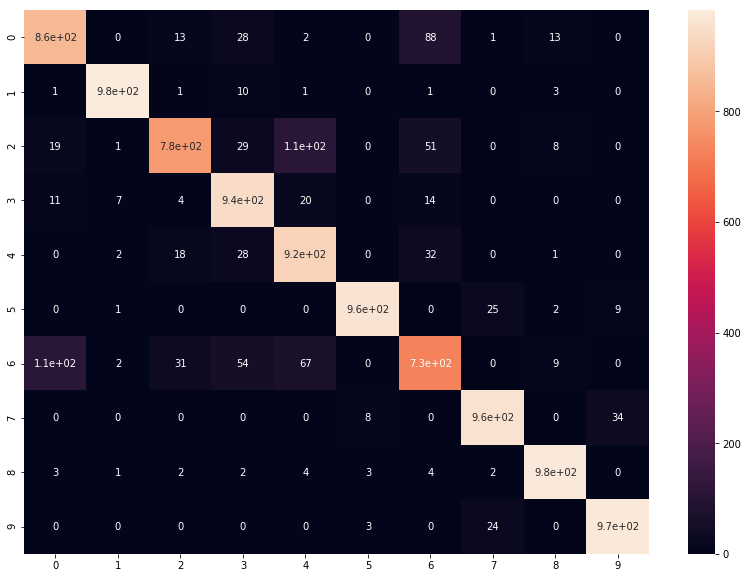

In [42]:
#here is the confusion_matrix
cm=confusion_matrix(y_test,predicted_classes)
plt.figure(figsize=(14,10))
sns.heatmap(cm,annot=True)    #using seaborn 

In [43]:
# here is the classification report
num_classes=10
target_names=[f"class{i}" for i in range(num_classes)]
print(classification_report (y_test,predicted_classes,target_names=target_names))

              precision    recall  f1-score   support

      class0       0.86      0.85      0.86      1000
      class1       0.99      0.98      0.98      1000
      class2       0.92      0.78      0.84      1000
      class3       0.86      0.94      0.90      1000
      class4       0.82      0.92      0.87      1000
      class5       0.99      0.96      0.97      1000
      class6       0.79      0.73      0.76      1000
      class7       0.95      0.96      0.95      1000
      class8       0.96      0.98      0.97      1000
      class9       0.96      0.97      0.97      1000

   micro avg       0.91      0.91      0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



## Conclusion
 
 Finally, we can say that by seeing the above plotted confusion matrix that most of the misclassifications are happening between the classes Shirt, T-shirt/top, Pullover and Coat which are majorly impacting the performance of the classifier.

And Deep Networks require large amount of training data to achieve good performance which we observed in our analysis how image augmentation boosted the classifier performance. To further improve the classifier performance, we should collect more samples and give more images from these 4 classes to the model so the classifier can learn more features or patterns even better.